we try to fit data using the beta distribution

In [135]:
%matplotlib inline 
from scipy.special import gamma
import matplotlib.pyplot as plt 
import numpy as np 
import experiment as ex
from scipy.odr import * 


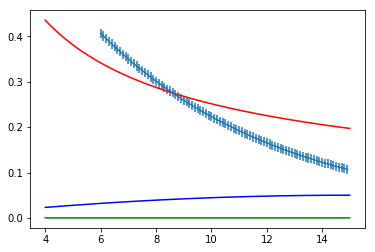

In [131]:
# plot the beta for different parameters 

a = 2
b = 2

# a,b are shape parameters 
def beta_dist(data,a,b,d):
    return [((x**(a-1))*((d-x)**(b-1)))/((gamma(a)*gamma(b)*(d**(a+b-1)))/gamma(a+b)) for x in data]

k = 6
t = 10
def gamma_dist(data,k,t):
    return [((t**k)/(gamma(k)))*(x**(k-1))*np.exp(-t*x) for x in data]

data = np.arange(4,15,0.01)

x = np.arange(6,15,.1)
plt.errorbar(x,np.exp([(-0.15)*xx for xx in x]),yerr=[0.01 for o in x])
plt.plot(data,beta_dist(data,a,b,2*np.max(data)),'b')
plt.plot(data,gamma_dist(data,k,t),'g')
plt.plot(data,data**-0.6,'r')

## two parameter exponential

we try a two-parameter fit for our nD data using the LCC, as it may capture the exponential scaling better, while giving up the nD_fraction=1 at <k> = 0 condition. however, the optimization may lead to strange scaling results as it tries to fit the data the best way. we shall see.

d = 2 object made
d = 2 LCC extracted


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: overflow encountered in exp


d = 3 object made
d = 3 LCC extracted
d = 6 object made
d = 6 LCC extracted
d = 9 object made
d = 9 LCC extracted
d = 15 object made
d = 15 LCC extracted
d = 25 object made
d = 25 LCC extracted


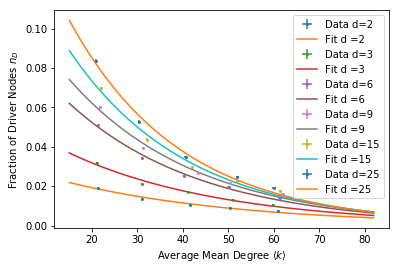

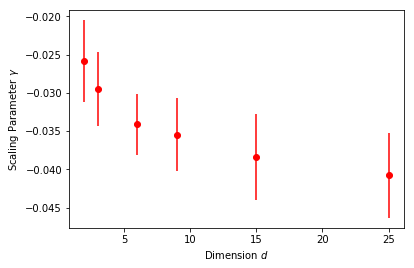

In [144]:
ndkfig = plt.figure(1)
ndkax = ndkfig.add_subplot(1,1,1)
gdfig = plt.figure(2)
gdax = gdfig.add_subplot(1,1,1)

# params
kappa_range = [20,30,40,50,60]
kappa_range_fine = np.arange(15,82,.01)
n = 1000
boundaries = ['g']
boundary= 'g'
d_range = [2,3,6,9,15,25]

## ER 
gdhandles = []
ndkhandles = []
gdlegend = []
ndklegend = []

# MODEL
def f(B, x):
    return B[1]*np.exp(B[0]*x)

color = 'r'
gammas = []
gamma_errs = []
for d in d_range:
    RGG = ex.RGGExperiment(kappa_range, n, d, shortcut_prob=0, boundary=boundary, num_radii=10)
    print 'd = '+str(d)+' object made'
    RGG.to_LCC()
    print 'd = '+str(d)+' LCC extracted'
    mean_degree_list, std_degree_list, _ = RGG.find_degree_stats()
    mean_nD_list, std_nD_list, _ = RGG.find_nD_stats_LCC()

    x = mean_degree_list
    y = mean_nD_list

    # plt.errorbar(x, y, fmt='none', yerr=RGG.std_nD_list, xerr=RGG.std_degree_list)
    # fitting 
    # popt = optimize.curve_fit(lambda t,b:np.exp(b*t), RGG.mean_degree_list, RGG.mean_nD_list)
    guess = [-0.5,0.5]
    wx = [s+1 for s in std_degree_list]
    wy = [s+1 for s in std_nD_list] 

    exponential = Model(f)
    data = Data(x, y, wd=wx, we=wy)
    odr = ODR(data, exponential, beta0=guess)
    output = odr.run()

    ndkrawhandle = ndkax.errorbar(mean_degree_list,mean_nD_list,xerr=std_degree_list,yerr=std_nD_list,fmt='o',markersize=2)
    ndkhandles.append(ndkrawhandle)
    ndklegend.append('Data d='+str(d))

    ndkhandle, = ndkax.plot(kappa_range_fine,f(output.beta,kappa_range_fine),'-')
    ndkhandles.append(ndkhandle)
    ndklegend.append('Fit d ='+str(d))

    gammas.append(output.beta[0])
    # 95% confidence is 2*standard error for gaussians 
    gamma_errs.append(2*output.sd_beta[0])

gdhandle = gdax.errorbar(d_range,gammas,yerr=gamma_errs,fmt=color+'o')
# gdhandles.append(gdhandle)
# gdlegend.append('Gaussian RGG')
    
gdax.set_xlabel('Dimension $d$')
gdax.set_ylabel('Scaling Parameter $\\gamma$')
# gdax.legend(gdhandles,gdlegend,loc='upper left')

ndkax.set_xlabel('Average Mean Degree $\\langle{k}\\rangle$')
ndkax.set_ylabel('Fraction of Driver Nodes $n_D$')
ndkax.legend(ndkhandles,ndklegend)

ndkfig.savefig('./plots/k_nD_LCC_20_fits_N_' + str(n) + '_BC_' + boundary + '_2param.eps',dpi=800)
gdfig.savefig('./plots/gamma_d_LCC_20_BC_' + '_N_' + str(n) + '_2param.eps',dpi=800)